<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий из HeadHunter
   

In [1]:
import pandas as pd
import psycopg2

In [2]:
# Чтобы избежать отображение предупреждений об использовании sqlalchemy 
import warnings
warnings.filterwarnings("ignore")

In [3]:
DBNAME = 'project_sql'
USER = 'skillfactory'
PASSWORD = 'cCkxxLVrDE8EbvjueeMedPKt'
HOST = '84.201.134.129'
PORT = 5432

In [4]:
# Выполняем подключение к базе  данных
connection = psycopg2.connect(
    dbname='project_sql',
    user='skillfactory',
    host='84.201.134.129',
    password='cCkxxLVrDE8EbvjueeMedPKt',
    port=5432
)

In [3]:
# давайте научимся хранить скрытую информацию правильно
# в корневой папке с проектом создаём файл .env туда переносим 5 переменных из ячейки выше
# во кладке source control добавляем .env файл в gitignore

import os
from dotenv import load_dotenv

load_dotenv()
DBNAME = os.getenv("DBNAME")
USER = os.getenv("USER")
PASSWORD = os.getenv("PASSWORD")
HOST = os.getenv("HOST")
PORT = os.getenv("PORT")

In [5]:
# Выполняем правильное подключение к базе данных
connection = psycopg2.connect(
    dbname=DBNAME,
    user=USER,
    host=HOST,
    password=PASSWORD,
    port=PORT
)

OperationalError: connection to server at "localhost" (::1), port 5432 failed: fe_sendauth: no password supplied


# Юнит 3. Предварительный анализ данных

1. Напишите запрос, который посчитает количество вакансий в нашей базе (вакансии находятся в таблице vacancies). 

In [ ]:
# текст запроса
query_3_1 = f'''select count(distinct id)
            from public.vacancies
            '''

In [ ]:
# результат запроса
vacancies_count = pd.read_sql_query(query_3_1, connection) # выполняем запрос к БД, результат сохраняем в переменную
display(vacancies_count)

,count
0,49197


In [ ]:
# Это не ошибка и не требование, просто хочу показать пример использования f-string
print(f'Число уникальных id вакансий: {vacancies_count.squeeze()}')

Число уникальных id вакансий: 49197


2. Напишите запрос, который посчитает количество работодателей (таблица employers). 

In [ ]:
# текст запроса
query_3_2 = f'''select count(distinct id)
            from public.employers
            '''

In [ ]:
# результат запроса
employers_count = pd.read_sql_query(query_3_2, connection)
display(employers_count)

,count
0,23501


3. Посчитате с помощью запроса количество регионов (таблица areas).

In [ ]:
# текст запроса
query_3_3 = f'''select count(distinct id)
            from public.areas
            '''

In [ ]:
# результат запроса
areas_count = pd.read_sql_query(query_3_3, connection)
display(areas_count)

,count
0,1362


4. Посчитате с помощью запроса количество сфер деятельности в базе (таблица industries).

In [ ]:
# текст запроса
query_3_4 = f'''select count(distinct id)
            from public.industries
            '''

In [ ]:
# результат запроса
industries_count = pd.read_sql_query(query_3_4, connection)
display(industries_count)

,count
0,294


***

##### Из рассмотренных метрик сложно сделать вывод, данные носят ознакомительный характер. Можно оценить масштаб базы данных, представвлены много сфер деятельности по многим городам. Также в среднем получается, что каждый работодатель имеет около 2х вакансий(но эта информация мало полезна, т.к. тут важнее медианное значение).

---
В выводах лучше избегать неоднгозначных оченочных суждений. Вместо много или мало, лучше констатировать факты, к примеру так:
### В представленной базе данных содержится информация о:
- 49197 вакансиях;
- 23501 работодателе;
- 1362 регионе;
- 294 сфере деятельности.

# Юнит 4. Детальный анализ вакансий

1. Напишите запрос, который позволит узнать, сколько (cnt) вакансий в каждом регионе (area).
Отсортируйте по количеству вакансий в порядке убывания.

In [ ]:
# текст запроса
query_4_1 = f'''select count(v.id) cnt,
                    a.name area
            from public.vacancies v         -- соединяем таблицы вакансий и регионов
                join public.areas a on v.area_id = a.id
            group by a.id                   -- группируем по региону
            order by cnt desc               -- сортируем по убыванию
            
            '''

In [ ]:
# результат запроса
cnt_vacansiesINarea = pd.read_sql_query(query_4_1, connection)
display(cnt_vacansiesINarea)

,cnt,area
0,5333,Москва
1,2851,Санкт-Петербург
2,2112,Минск
3,2006,Новосибирск
4,1892,Алматы
...,...,...
764,1,Кизляр
765,1,Джизак
766,1,Эртиль
767,1,Арсеньев


2. Напишите запрос, чтобы определить у какого количества вакансий заполнено хотя бы одно из двух полей с зарплатой.

In [ ]:
# текст запроса
query_4_2 = f'''select count(v.id) cnt
            from public.vacancies v
            where v.salary_from is not null or v.salary_to is not null
            '''

In [ ]:
# результат запроса
cnt_vacansies_withSALARY = pd.read_sql_query(query_4_2, connection)
display(cnt_vacansies_withSALARY)

,cnt
0,24073


3. Найдите средние значения для нижней и верхней границы зарплатной вилки. Округлите значения до целого.

In [ ]:
# текст запроса
query_4_3 = f'''select avg(v.salary_from) bottom,
                avg(v.salary_to) top
            from public.vacancies v
            '''

In [ ]:
# результат запроса
salary = pd.read_sql_query(query_4_3, connection)
display(round(salary, 0))

,bottom,top
0,71065.0,110537.0


4. Напишите запрос, который выведет количество вакансий для каждого сочетания типа рабочего графика (schedule) и типа трудоустройства (employment), используемого в вакансиях. Результат отсортируйте по убыванию количества.


In [ ]:
# текст запроса
query_4_4 = f'''select schedule,
                employment,
                count(id)                   -- считаем количество вакансий
            from public.vacancies v
            group by schedule, employment   -- группируем по графику, типу трудоустройства
            order by 3 desc
            '''

In [ ]:
# результат запроса
Cnt_4_4 = pd.read_sql_query(query_4_4, connection)
display(Cnt_4_4)

,schedule,employment,count
0,Полный день,Полная занятость,35367
1,Удаленная работа,Полная занятость,7802
2,Гибкий график,Полная занятость,1593
3,Удаленная работа,Частичная занятость,1312
4,Сменный график,Полная занятость,940
5,Полный день,Стажировка,569
6,Вахтовый метод,Полная занятость,367
7,Полный день,Частичная занятость,347
8,Гибкий график,Частичная занятость,312
9,Полный день,Проектная работа,141


5. Напишите запрос, выводящий значения поля Требуемый опыт работы (experience) в порядке возрастания количества вакансий, в которых указан данный вариант опыта. 

In [ ]:
# текст запроса
query_4_5 = f'''select experience,
                count(id)
            from public.vacancies 
            group by experience
            order by 2
            '''

In [ ]:
# результат запроса
experience = pd.read_sql_query(query_4_5, connection)
display(experience)

,experience,count
0,Более 6 лет,1337
1,Нет опыта,7197
2,От 3 до 6 лет,14511
3,От 1 года до 3 лет,26152


***

In [ ]:
# выводы по детальному анализу вакансий

#### Наибольшее количество вакансий в крупных городах, все закономерно. Только у половины из размещенных вакансий указан хотя бы одна граница по зарплате. В среденм уровень зарплат находится в диапазоне 71000 - 110000 руб.  Наиболее распространенный график работы для вакансий с большим отрывом - удаленная работа(полная занятость), тут тоже ничего удивительного, это самый распростаненный вариант, на втором месте удаленная работа, но таких вакансий в 5 раз меньше. В основном в вакансиях ищут работников с опытом работы от 1 года до 3 лет.

# Юнит 5. Анализ работодателей

1. Напишите запрос, который позволит узнать, какие работодатели находятся на первом и пятом месте по количеству вакансий.

In [ ]:
# текст запроса
query_5_1 = f''' select e.name, count(v.id)
                from public.vacancies v                          -- соединяем таблицы вакансии и работодатели по ключу
                join public.employers e on v.employer_id = e.id
                group by e.id
                order by count(v.id) desc
        '''

In [ ]:
# результат запроса
top_employers = pd.read_sql_query(query_5_1, connection)
display(top_employers.iloc[[0,4]])                      # Выводим 1е и 5е места 

,name,count
0,Яндекс,1933
4,Газпром нефть,331


2. Напишите запрос, который для каждого региона выведет количество работодателей и вакансий в нём.
Среди регионов, в которых нет вакансий, найдите тот, в котором наибольшее количество работодателей.


In [ ]:
# текст запроса
query_5_2 = f''' select a.name,
                        count(e.id) cnt_employers, 
                        count(v.id) cnt_vacancies
                from public.areas a                               --к таблице с регионами присоединяем таблицы с вакансиями
                left join public.vacancies v on a.id = v.area_id  -- и работодателями, причем оставляем все регионы
                left join public.employers e on e.area = a.id
                group by a.id
                having count(v.id) = 0                             -- по условию, что вакансий нет
                order by cnt_employers desc  
                limit 1           
'''

In [ ]:
# результат запроса
area_cnt_empANDvac = pd.read_sql_query(query_5_2,connection)
display(area_cnt_empANDvac)

,name,cnt_employers,cnt_vacancies
0,Россия,410,0


3. Для каждого работодателя посчитайте количество регионов, в которых он публикует свои вакансии. Отсортируйте результат по убыванию количества.


In [ ]:
# текст запроса
query_5_3 = f'''select e.name,
                        count(distinct v.area_id)
                from public.employers e
                join public.vacancies v on e.id = v.employer_id
                group by e.id
                order by 2 desc  
                  '''

In [ ]:
# результат запроса
empoyers_area = pd.read_sql_query(query_5_3,connection)
display(empoyers_area)

,name,count
0,Яндекс,181
1,Ростелеком,152
2,Спецремонт,116
3,Поляков Денис Иванович,88
4,ООО ЕФИН,71
...,...,...
14901,НПП Авиатрон,1
14902,Центр дистанционных торгов,1
14903,Городские Телекоммуникационные Системы,1
14904,"Введенский, Отель",1


4. Напишите запрос для подсчёта количества работодателей, у которых не указана сфера деятельности. 

In [ ]:
# текст запроса
query_5_4 = f''' select count(e.id)
                from public.employers e
                left join public.employers_industries ei on e.id = ei.employer_id
                where ei.industry_id is null
                  '''


In [ ]:
# результат запроса
empolyers_ = pd.read_sql_query(query_5_4,connection)
display(empolyers_)


,count
0,8419


5. Напишите запрос, чтобы узнать название компании, находящейся на третьем месте в алфавитном списке (по названию) компаний, у которых указано четыре сферы деятельности. 

In [ ]:
# текст запроса
query_5_5 = f''' select e.name
                from public.employers e                                -- соединяя таблицы, оставляем всех работодателей
                left join public.employers_industries ei on e.id = ei.employer_id
                group by e.id
                having count(ei.industry_id) = 4
                order by 1
                offset 2
                limit 1
                
                  '''


In [ ]:
# результат запроса
empolyers_ = pd.read_sql_query(query_5_5,connection)
display(empolyers_)

,name
0,2ГИС


6. С помощью запроса выясните, у какого количества работодателей в качестве сферы деятельности указана Разработка программного обеспечения.


In [ ]:
# текст запроса
query_5_6 = f''' select count(e.id)
                from public.employers e           -- тут тоже оставляем всех работодателей, даже тех, у коно не указаны сферы дейстельности
                left join public.employers_industries ei on e.id = ei.employer_id
                left join public.industries i on i.id = ei.industry_id
                where i.name = 'Разработка программного обеспечения'
                
                  '''

In [ ]:
# результат запроса
empolyers_cnt = pd.read_sql_query(query_5_6,connection)
display(empolyers_cnt)

,count
0,3553


7. Для компании «Яндекс» выведите список регионов-миллионников, в которых представлены вакансии компании, вместе с количеством вакансий в этих регионах. Также добавьте строку Total с общим количеством вакансий компании. Результат отсортируйте по возрастанию количества.

Список городов-милионников надо взять [отсюда](https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8). 

Если возникнут трудности с этим задание посмотрите материалы модуля  PYTHON-17. Как получать данные из веб-источников и API. 

In [ ]:
# код для получения списка городов-милионников
import requests # Импортируем библиотеку requests
from bs4 import BeautifulSoup # Импортируем библиотеку BeautifulSoup
from pprint import pprint
url = 'https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8#%D0%A1%D0%BF%D0%B8%D1%81%D0%BE%D0%BA_%D0%B3%D0%BE%D1%80%D0%BE%D0%B4%D0%BE%D0%B2' # Определяем адрес страницы
response = requests.get(url) # Выполняем GET-запрос, содержимое ответа присваивается переменной response
page = BeautifulSoup(response.text, 'html.parser') # Создаём объект BeautifulSoup, указывая html-парсер
# Далее видим, что название городов находятся в теге <a>. Таких тегов много, поэтому:
links = page.find_all('a') # Ищем все ссылки на странице и сохраняем в переменной links в виде списка
print(len(links)) # Выводим количество найденных ссылок
# Запишем все что нашли в список city, 
city = []
for link in links:
    city.append(link.text)
#Далее получим только города из всего, что нашлось. 
index = city.index('Москва') # Находим индекс первого города
print(index)
city_millions = tuple(city[41:57]) # Зная, что городов-миллионников 16, берем соответствующие индексы
                            # и сохраним результат в кортеже city_millions
print(type(city_millions))

931
41
<class 'tuple'>


In [ ]:
# текст запроса
query_5_7 = f''' select e.name as "Компания",
                        a.name as "Город",
                        count(v.id) as "Количество вакансий"
                from public.vacancies v   -- соединяем таблицу с вакансиями с таблицами работодателей и регионов
                join public.employers e on e.id = v.employer_id
                join public.areas a on a.id = v.area_id
                where e.name = 'Яндекс' and a.name in {city_millions}  --фильтруем по компании и городам-миллионникам
                group by e.name, a.name                                -- группируем по компании и городу
                UNION ALL                                              -- Соединяем со строкой Total
                select 'Яндекс',
                        'Total',
                        count(v.id)
                from public.vacancies v
                join public.employers e on e.id = v.employer_id
                join public.areas a on a.id = v.area_id
                where e.name = 'Яндекс' and a.name in {city_millions}
                group by e.name                                       -- группируем только по компании
                order by 3
                  '''

In [ ]:
# результат запроса
yandex_vac = pd.read_sql_query(query_5_7,connection)
display(yandex_vac)

,Компания,Город,Количество вакансий
0,Яндекс,Омск,21
1,Яндекс,Челябинск,22
2,Яндекс,Красноярск,23
3,Яндекс,Волгоград,24
4,Яндекс,Пермь,25
5,Яндекс,Казань,25
6,Яндекс,Ростов-на-Дону,25
7,Яндекс,Уфа,26
8,Яндекс,Самара,26
9,Яндекс,Краснодар,30


***

In [ ]:
# выводы по анализу работодателей

#### Выводы
Всего в БД представлен 23501 работодатель. В процессе анализа мы выяснили, что Яндекс является лидером по количеству вакансий(1933) с большим отрывом (остальные менее 500). В первой пятерке 4 компании, так или иначе качающиеся IT (Ростелеком, Тинькофф, СБЕР). Также часть этих компаний имеют широкое представительство по многим регионам России(Яндекс, Ростелеком), что объясняет их количество вакансий. Причем на примере компании Яндекс мы выяснили, что она широко представлена в небольших городах, т.к. всего около 25% вакансий представлены в городах-миллионниках. У 15% вакансий в качестве сферы деятельности указано "Разработка программного обеспечения", а около четверти работодателей вообще не указывают сферу деятельности.

# Юнит 6. Предметный анализ

1. Сколько вакансий имеет отношение к данным?

Считаем, что вакансия имеет отношение к данным, если в её названии содержатся слова 'data' или 'данн'.

*Подсказка: Обратите внимание, что названия вакансий могут быть написаны в любом регистре.* 


In [ ]:
# текст запроса
query_6_1 = f'''select count(*)
                from vacancies v
                where lower(v.name) like '%данн%' or lower(v.name) like '%data%' --приводим к нижнему регистру и ищем совпадения
                '''

In [ ]:
# результат запроса
DS_vacancies_count = pd.read_sql_query(query_6_1,connection)
display(DS_vacancies_count)

,count
0,1771


2. Сколько есть подходящих вакансий для начинающего дата-сайентиста? 
Будем считать вакансиями для дата-сайентистов такие, в названии которых есть хотя бы одно из следующих сочетаний:
* 'data scientist'
* 'data science'
* 'исследователь данных'
* 'ML' (здесь не нужно брать вакансии по HTML)
* 'machine learning'
* 'машинн%обучен%'

** В следующих заданиях мы продолжим работать с вакансиями по этому условию.*

Считаем вакансиями для специалистов уровня Junior следующие:
* в названии есть слово 'junior' *или*
* требуемый опыт — Нет опыта *или*
* тип трудоустройства — Стажировка.
 

In [ ]:
# текст запроса

query_6_2 = f'''select count(id)
                from vacancies 
                where 
                (lower(name) like '%data scientist%'    -- записываем условия для отнесения вакансии к DS
                or lower(name) like '%data science%'
                or lower(name) like '%исследователь данных%'
                or (lower(name) like '%ml%' and lower(name) not like '%html%')
                or lower(name) like '%machine learning%'
                or lower(name) like '%машинн%обучен%')
                and 
                (lower(name) like '%junior%'            -- записываем условия для отнесения вакансии к уровню Junior
                or experience like 'Нет опыта'
                or employment like 'Стажировка')
                '''


In [ ]:
# результат запроса

young_DS_vacancies_count = pd.read_sql_query(query_6_2,connection)
display(young_DS_vacancies_count)

,count
0,51


3. Сколько есть вакансий для DS, в которых в качестве ключевого навыка указан SQL или postgres?

** Критерии для отнесения вакансии к DS указаны в предыдущем задании.*

In [ ]:
# текст запроса
query_6_3 = f'''select count(id)
                from vacancies 
                where 
                (lower(name) like '%data scientist%'        -- записываем условия для отнесения вакансии к DS
                or lower(name) like '%data science%'
                or lower(name) like '%исследователь данных%'
                or (lower(name) like '%ml%' and lower(name) not like '%html%')
                or lower(name) like '%machine learning%'
                or lower(name) like '%машинн%обучен%')
                and 
                (lower(key_skills) like '%sql%'            -- записываем условия для соответсвия навыка заданному условию
                or lower(key_skills) like '%postgres%' 
                )
                '''

In [ ]:
# результат запроса
DS_vacancies_sql = pd.read_sql_query(query_6_3,connection)
display(DS_vacancies_sql)

,count
0,229


4. Проверьте, насколько популярен Python в требованиях работодателей к DS.Для этого вычислите количество вакансий, в которых в качестве ключевого навыка указан Python.

** Это можно сделать помощью запроса, аналогичного предыдущему.*

In [ ]:
# текст запроса
query_6_4 = f'''select count(id)
                from vacancies 
                where 
                (lower(name) like '%data scientist%'
                or lower(name) like '%data science%'
                or lower(name) like '%исследователь данных%'
                or (lower(name) like '%ml%' and lower(name) not like '%html%')
                or lower(name) like '%machine learning%'
                or lower(name) like '%машинн%обучен%')
                and 
                lower(key_skills) like '%python%'
               '''

In [ ]:
# результат запроса
DS_vacancies_python = pd.read_sql_query(query_6_4,connection)
display(DS_vacancies_python)

,count
0,357


5. Сколько ключевых навыков в среднем указывают в вакансиях для DS?
Ответ округлите до двух знаков после точки-разделителя.

In [ ]:
# текст запроса (один вариант решения)
query_6_5 = f'''
with t as(                                                                      -- создаем таблицу t для вакансий DS
select *              
from vacancies 
where 
    (lower(name) like '%data scientist%'
    or lower(name) like '%data science%'
    or lower(name) like '%исследователь данных%'
    or (name like '%ML%' and name not like '%HTML%')
    or lower(name) like '%machine learning%'
    or lower(name) like '%машинн%обучен%'))
select 
    round(avg((length(key_skills) - length(REPLACE(key_skills, '\t', '')))+1),2)  -- видим, что навыки разделяются символом \t,
    -- поэтому вычисляем длину строки, затем вычитаем длину строки без этих символов, добавляем 1 и считаем среднее
from t
where key_skills is not null                                                      -- явно говорим, что пустые поля key_skills не берем во
'''
DS_vacancies_python = pd.read_sql_query(query_6_5,connection)
display(DS_vacancies_python)

,round
0,6.41


#### Замечание к заданию
Ответ сошелся, но я не согласен с решением.  Как было в курсе - функция AVG если встречает Null, то функция его не считает, например условно две вакансии, в одной key_skills = 10, во второй None, то функция AVG разделит 10/1=10, но в среднем то на две вакансии будет 10/2=5 навыков. 
Собственно и в коде указывая условие key_skills IS NOT NULL мы явно убираем все пропуски в столбце key_skill, хотя это не обязательно, AVG и так их не берет во внимание (в нашем коде если убрать это условие, то ответ не изменится). 
Но получается мы на вопрос задания "Сколько ключевых навыков в среднем указывают в вакансиях для DS?" не отвечаем корректно, мы отвечаем на вопрос "Из тех вакансий, где указаны ключевые навыки, сколько ключевых навыков в среднем указывают в вакансиях для DS?". А чтоб на вопрос задания ответить, нужно вместо null подставить 0, чтоб AVG посчитал эти строки.

In [ ]:
# Второй вариант решения
query_6_5 = f'''
   select
round(avg(length(key_skills) - length(replace(key_skills,CHR(9),''))+1),2)  -- тут тоже самое, но без вложенного запроса
                                                                            -- визуально легче понять
from vacancies v

WHERE
(
       (v.name ILIKE '%data scientist%')
    OR (lower(v.name) ILIKE '%data science%')
    OR (v.name ILIKE '%исследователь данных%')
    OR (v.name  LIKE '%ML%' AND  (v.name NOT iLIKE '%html%'))
    OR (v.name ILIKE '%machine learning%')
    OR (v.name ILIKE '%машинн%обучен%')
    --AND (key_skills IS NOT NULL)
)
    '''



In [ ]:
# результат запроса

cnt_skills = pd.read_sql_query(query_6_5,connection)
display(cnt_skills)

,round
0,6.41


6. Напишите запрос, позволяющий вычислить, какую зарплату для DS в **среднем** указывают для каждого типа требуемого опыта (уникальное значение из поля *experience*). 

При решении задачи примите во внимание следующее:
1. Рассматриваем только вакансии, у которых заполнено хотя бы одно из двух полей с зарплатой.
2. Если заполнены оба поля с зарплатой, то считаем зарплату по каждой вакансии как сумму двух полей, делённую на 2. Если заполнено только одно из полей, то его и считаем зарплатой по вакансии.
3. Если в расчётах участвует null, в результате он тоже даст null (посмотрите, что возвращает запрос select 1 + null). Чтобы избежать этой ситуацию, мы воспользуемся функцией [coalesce](https://postgrespro.ru/docs/postgresql/9.5/functions-conditional#functions-coalesce-nvl-ifnull), которая заменит null на значение, которое мы передадим. Например, посмотрите, что возвращает запрос `select 1 + coalesce(null, 0)`

Выясните, на какую зарплату в среднем может рассчитывать дата-сайентист с опытом работы от 3 до 6 лет. Результат округлите до целого числа. 

In [ ]:
# текст запроса
query_6_6 = f'''
select
   experience,
   round(AVG(case when (salary_from is not null and salary_to is not null)  -- когда оба поля с зарплатой ненулевые
      then (salary_from + salary_to)/2                                      -- их сумму делим на 2
      else (coalesce(salary_from, 0)+coalesce(salary_to, 0)) end)) as mean_salary -- иначе берем только одно значение (т.к. знаем, что )
                                                                                 -- одно из них будет 0, и чтоб коррекно получить ответ
                                                                                 -- используем функцию coalesce

from vacancies v

WHERE
(
       (v.name ILIKE '%data scientist%')                                      -- условие для вакансий DS
    OR (lower(v.name) ILIKE '%data science%')
    OR (v.name ILIKE '%исследователь данных%')
    OR (v.name  LIKE '%ML%' AND  (v.name NOT iLIKE '%html%'))
    OR (v.name ILIKE '%machine learning%')
    OR (v.name ILIKE '%машинн%обучен%')
)
and (salary_from is not null or salary_to is not null)                         -- условие что хотя бы одна из запрлат не пустая
group by experience
    '''

In [ ]:
# результат запроса
avg_salary = pd.read_sql_query(query_6_6,connection)
display(avg_salary)

,experience,mean_salary
0,Нет опыта,74643.0
1,От 1 года до 3 лет,139675.0
2,От 3 до 6 лет,243115.0


***

In [ ]:
# выводы по предметному анализу

##### Выводы
В целом к данным имеет отношение не так много вакансий (1771/49197 = 3,5 %). 
Для начинающего DS ситуация не из простых, всего 51 вакансия. В среднем нужно иметь около 6-7 ключевых навыков, причем Python встречается примерно в полтора раза чаще, чем SQL. Средняя зарплата увеличивается чуть менее чем в 2 раза при переходе на каждую ступень опыта работы.

# Общий вывод по проекту

In [ ]:
# подведем итог исследования, обобщите выводы
# здесь можно (это будет плюсом) провести дополнительные исследования данных, сделать прогнозы, продумать варианты продолжения исследования

##### Итак, мы рассмотрели базу данных вакансий с сайта HH.ru, в которой было 49197 вакансий, 23501 компания(работодатель) по 1362 регионам в 294 сферах деятельности.
Ожидаемо лидеры по работодателям и вакансиям - крупные города, причем Москва как мегаполис - с огромным отрывом. Средняя вилка зарплат составляет 71000 - 110000 рублей (при этом в этом диапазоне находится только средняя ЗП для начинающего DS, а с увеличением опыта ЗП для DS будет выше рынка, это радует).  
Очевидно, что наиболее распространенный вариант работы - полный день, полная занятость. 
Прямой зависимости между опытом работы и количетсвом вакансий нет, но видно, что в приоритете нужны специалисты с опытом от 1 года до 3 лет (26152 вакансии).
Интересно посмотреть на компании в разрезе широты регионов, где представлены их вакансии. Лидеры - Яндекс и Ростелеком. В случае с Ростелеком ситуация понятна, компания предоставляет услуги связи(домашнего интеренета) и должна быть представлена в регионах, но с Яндекс интереснее. Если взглянуть на топ регионов по вакансиям для этой компании не в городах-миллионниках, то вакансий в них будет столько же, как и в городах-миллионнках. Для чего компании яндекс такая широкая география? МОжно предполодить, что компания имеет несколько бизнесов, в том числе такси и доставка, но если посмотреть на вакансии на примере нескольких городов, то вакансий такси/доставка там не будет. Это говорит о том, что офисы компании яндекс широко диферсифицированы по регионам и направлены только на IT направление бизнеса.  
Интересно, что компания Ozon имеет вакансии только в 36 регионах. Либо в других регионах все вакансии заняты и свободных нет, либо БД старая и с тех пор очевидно, что компания имеет вредставительство почти во всех регионах России.  
Также из интересного можно выделить, что в с ростом опыта работы (ступени без опыта- 1-3 года - 3-6 лет) уровень зарплат увеличивается чуть менее чем в два раза. На последней ступени (более 6 лет) рост не такой большой.



In [ ]:
# Посмотрим на топ 20 городов по количеству работодатлей и вакансий в этих городах
query_7_1 = f''' select a.name,
                        count(distinct e.id) cnt_employers, 
                        count(v.id) cnt_vacancies
                from public.areas a                               --к таблице с регионами присоединяем таблицы с вакансиями
                left join public.vacancies v on a.id = v.area_id  -- и работодателями, причем оставляем все регионы
                left join public.employers e on e.area = a.id
                group by a.id
                order by cnt_employers desc  
                   
'''
area_info = pd.read_sql_query(query_7_1,connection)
display(area_info.head(20))

,name,cnt_employers,cnt_vacancies
0,Москва,5864,31272712
1,Санкт-Петербург,2217,6320667
2,Минск,1115,2354880
3,Алматы,721,1364132
4,Екатеринбург,609,1034082
5,Новосибирск,573,1149438
6,Казань,480,679200
7,Нижний Новгород,426,711420
8,Россия,410,0
9,Краснодар,409,532109


In [ ]:
# Посмотрим на топ20 компаний по ширине охвата территорий, где представлены их вакансии
query_7_2 = f'''select e.name,
                        count(distinct v.area_id)
                from public.employers e
                join public.vacancies v on e.id = v.employer_id
                group by e.id
                order by 2 desc  
                  '''
employers_area = pd.read_sql_query(query_7_2,connection)
display(employers_area.head(20))

,name,count
0,Яндекс,181
1,Ростелеком,152
2,Спецремонт,116
3,Поляков Денис Иванович,88
4,ООО ЕФИН,71
5,Совкомбанк,63
6,МТС,55
7,"ЭФКО, Управляющая компания",49
8,КРОН,48
9,Почта России,48


In [ ]:
# Посмотрим на топ20 городов не миллионников по вакансиям яндекс
query_7_3 = f''' select e.name as "Компания",
                        a.name as "Город",
                        count(v.id) as "Количество вакансий"
                from public.vacancies v   -- соединяем таблицу с вакансиями с таблицами работодателей и регионов
                join public.employers e on e.id = v.employer_id
                join public.areas a on a.id = v.area_id
                where e.name = 'Яндекс' and a.name not in {city_millions}  --фильтруем по компании и городам-миллионникам
                group by e.name, a.name                                -- группируем по компании и городу
                order by 3 desc
                '''

vac_yandex = pd.read_sql_query(query_7_3,connection)
display(vac_yandex.head(20))

,Компания,Город,Количество вакансий
0,Яндекс,Владивосток,27
1,Яндекс,Оренбург,24
2,Яндекс,Хабаровск,24
3,Яндекс,Ижевск,23
4,Яндекс,Ярославль,23
5,Яндекс,Саратов,23
6,Яндекс,Иркутск,23
7,Яндекс,Тольятти,22
8,Яндекс,Астрахань,21
9,Яндекс,Махачкала,21


In [ ]:
# Посмотрим на топ20 городов не миллионников по вакансиям яндекс
query_7_4 = f''' select e.name as "Компания",
                        a.name as "Город",
                        v.name
                from public.vacancies v   -- соединяем таблицу с вакансиями с таблицами работодателей и регионов
                join public.employers e on e.id = v.employer_id
                join public.areas a on a.id = v.area_id
                where e.name = 'Яндекс' and a.name in ('Томск', 'Кемерово')
                --group by e.name, a.name                                -- группируем по компании и городу
                order by 2 desc
                '''

vac_yandex = pd.read_sql_query(query_7_4,connection)
display(vac_yandex)

,Компания,Город,name
0,Яндекс,Томск,Специалист службы поддержки с техническими зна...
1,Яндекс,Томск,Тимлид клиентского сервиса
2,Яндекс,Томск,Специалист поддержки в Яндекс Бизнес
3,Яндекс,Томск,Разработчик (поисковая выдача)
4,Яндекс,Томск,Специалист службы поддержки пользователей
5,Яндекс,Томск,Эксперт по ответам на вопросы о Яндекс Бизнесе
6,Яндекс,Томск,Специалист поддержки в Толоку со знанием англи...
7,Яндекс,Томск,Специалист по общению с клиентами в Яндекс Бизнес
8,Яндекс,Томск,Специалист службы поддержки в Яндекс Бизнес
9,Яндекс,Томск,Сотрудник поддержки поиска Яндекса


In [ ]:
query_7_5 = f''' select i.name
                from public.employers e           -- тут тоже оставляем всех работодателей, даже тех, у коно не указаны сферы дейстельности
                left join public.employers_industries ei on e.id = ei.employer_id
                left join public.industries i on i.id = ei.industry_id
                --join public.vacancies v on e.id = v.employer_id
                where e.name = 'Яндекс' 
                
                  '''

vac_yandex_name = pd.read_sql_query(query_7_5,connection)
display(vac_yandex_name)

,name
0,"Интернет-компания (поисковики, платежные систе..."


In [ ]:
query_7_6 = f'''select 
                v.experience,
                round(avg(v.salary_from)) bottom,
                round(avg(v.salary_to)) top
            from public.vacancies v
            group by  v.experience
            order by 2
            '''
salary_exp = pd.read_sql_query(query_7_6,connection)
display(salary_exp)

,experience,bottom,top
0,Нет опыта,34699.0,56990.0
1,От 1 года до 3 лет,64456.0,97436.0
2,От 3 до 6 лет,112544.0,171974.0
3,Более 6 лет,150156.0,197819.0


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

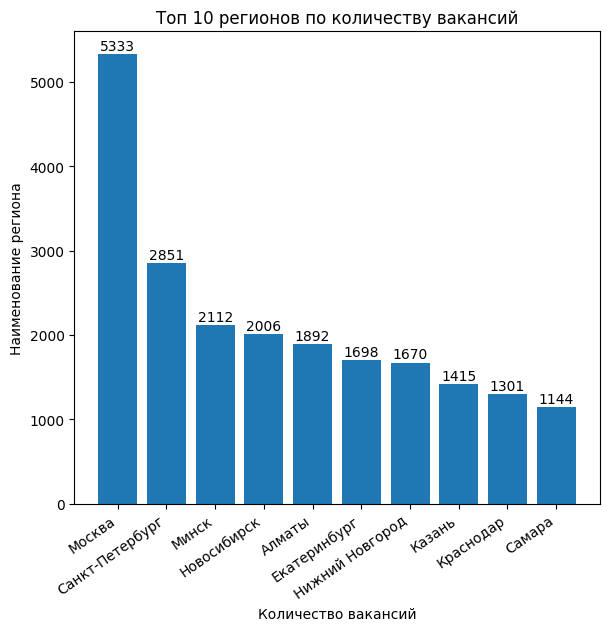

In [ ]:
top_10_cities = '''
SELECT
    COUNT(v.id) AS cnt,
    a.name AS area
FROM vacancies v
JOIN areas a ON v.area_id=a.id
GROUP BY a.name
ORDER BY cnt DESC
LIMIT 10
'''

df = pd.read_sql_query(top_10_cities, connection)

import matplotlib.pyplot as plt
# создадим фигуру и отрисуем график 
fig, ax = plt.subplots(figsize=(6, 6))
ax.bar(x=df.area.values, height=df.cnt.values)

# Добавим подписи данных
for at_x, at_y in enumerate(df.cnt):
    ax.text(at_x, at_y + 50, round(at_y, 1), horizontalalignment='center')

# Повернём подписи столбцов на оси х
plt.xticks(rotation=35, horizontalalignment='right')
plt.tight_layout()

# добавим подписи осей и графика
ax.set(xlabel='Количество вакансий', 
       ylabel='Наименование региона', 
       title='Топ 10 регионов по количеству вакансий',
       );


# выведем на экран результат
fig.show()

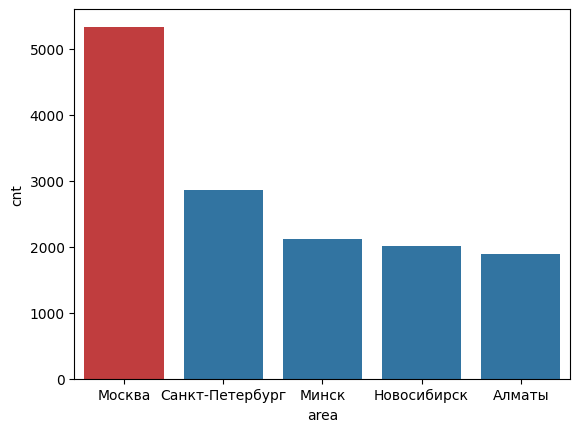

In [ ]:
query_4_1 = f'''
SELECT a.name area, COUNT(v.area_id) cnt
FROM vacancies v JOIN areas a ON v.area_id = a.id
GROUP BY a.id, a.name
ORDER BY 2 DESC
LIMIT 5
'''
df = pd.read_sql_query(query_4_1, connection)

filtred_color = [('tab:red' if x > 3000 else 'tab:blue') for x in df.cnt]
sns.barplot(df, x='area', y='cnt', palette=filtred_color);

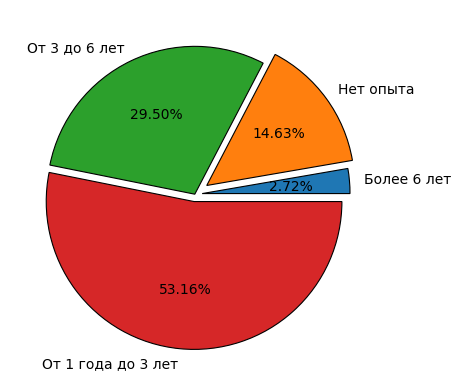

In [ ]:
query_4_5 = f'''
SELECT experience, COUNT(id)
FROM vacancies
GROUP BY 1
ORDER BY 2
'''
df = pd.read_sql_query(query_4_5, connection)

plt.pie(
    df['count'],
    labels = df['experience'].values,
    autopct = '%.2f%%',
    explode = (0.05, 0.1, 0, 0.05),
    wedgeprops = {'lw':0.8,'edgecolor':'k'},   
);

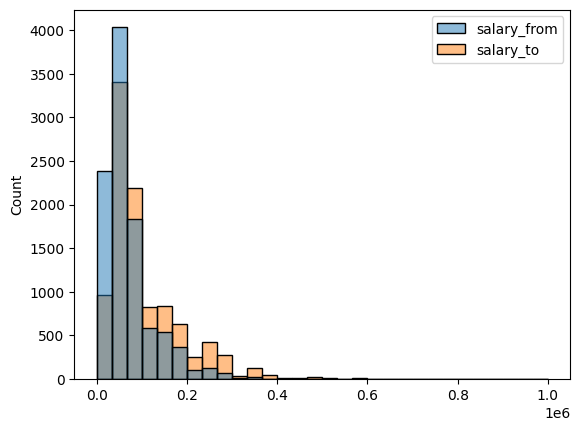

In [ ]:
query_4_3 = f'''
SELECT salary_from as salary_from, salary_to as salary_to
FROM vacancies
'''
df = pd.read_sql_query(query_4_3, connection)
df.dropna(inplace=True)
sns.histplot(data=df, bins=30);

In [ ]:
# в конце работы не забываем закрыть соединение
connection.close()